# BOOSTING ALGORITHMS

In [1]:
# installing liberary for xgboost

# !pip install xgboost

In [2]:
# necessary liberaries for data manupulation
import pandas as pd
import numpy as np

# for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# parameters for graph
plt.rcParams['figure.figsize'] = (10, 5) 
plt.rcParams['figure.dpi'] = 250

# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# for model and data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import classification_report

In [3]:
# training data

train = pd.read_csv('https://raw.githubusercontent.com/dhanesh-sakre/DATA-SCIENCE/refs/heads/main/Assignment/XGBM%20AND%20LGBM/Titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# testing data

test = pd.read_csv('https://raw.githubusercontent.com/dhanesh-sakre/DATA-SCIENCE/refs/heads/main/Assignment/XGBM%20AND%20LGBM/Titanic_test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# EDA

###  descriptive statistics

In [5]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [6]:
# one column is having missing values
# some columns are skewed
# there may be some outliers in fare column

In [7]:
# categorical columns
train.describe(include='object').T

,count,unique,top,freq
Name,891,891,"Braund, Mr. Owen Harris",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,204,147,B96 B98,4
Embarked,889,3,S,644


In [8]:
train.shape

(891, 12)

In [9]:
# cabin and embarked column are having null values

In [10]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


In [11]:
# two columns are having null values
# and there are some outliers in Fare column

In [12]:
# for categorical columns
test.describe(include='object').T

,count,unique,top,freq
Name,418,418,"Kelly, Mr. James",1
Sex,418,2,male,266
Ticket,418,363,PC 17608,5
Cabin,91,76,B57 B59 B63 B66,3
Embarked,418,3,S,270


In [13]:
test.shape

(418, 11)

In [14]:
# cabin column is having missing values

### confirming for null values

In [15]:
train_miss = print(train.isna().sum())
train_miss

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [16]:
# here,  two columns are having  missing vales

In [17]:
# precentage of missing values
print(f'percentage of missing values :\n {train.isna().sum()/train.shape[0]}')

percentage of missing values :
 PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64


In [18]:
# there are lots 77%  missing values in the Cabin column so I need to drop it
# Age column is having almost 20 % missing values so I will impute this values

In [19]:
test_miss = print(test.isna().sum())
test_miss

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [20]:
# here also,  two columns are having  missing vales

In [21]:
# precentage of missing values
print(f'percentage of missing values :\n {test.isna().sum()/test.shape[0]}')

percentage of missing values :
 PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64


In [22]:
# I need to drop cabin column because it having 78% missing values
# impute missing values in the age and fare column

# column names

In [23]:
# training data
train_col = train.columns.to_list()
train_col

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [24]:
# testind data
test_col = test.columns.to_list()
test_col

['PassengerId',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [25]:
# getting unique values of tain data
for col in train_col:
    print(f'{col} has {train[col].nunique()} unique values')
    print('--' * 30)

PassengerId has 891 unique values
------------------------------------------------------------
Survived has 2 unique values
------------------------------------------------------------
Pclass has 3 unique values
------------------------------------------------------------
Name has 891 unique values
------------------------------------------------------------
Sex has 2 unique values
------------------------------------------------------------
Age has 88 unique values
------------------------------------------------------------
SibSp has 7 unique values
------------------------------------------------------------
Parch has 7 unique values
------------------------------------------------------------
Ticket has 681 unique values
------------------------------------------------------------
Fare has 248 unique values
------------------------------------------------------------
Cabin has 147 unique values
------------------------------------------------------------
Embarked has 3 unique value

In [26]:
# getting unique values of test data
for col in test_col:
    print(f'{col} has {test[col].nunique()} unique values')
    print('--' * 30)

PassengerId has 418 unique values
------------------------------------------------------------
Pclass has 3 unique values
------------------------------------------------------------
Name has 418 unique values
------------------------------------------------------------
Sex has 2 unique values
------------------------------------------------------------
Age has 79 unique values
------------------------------------------------------------
SibSp has 7 unique values
------------------------------------------------------------
Parch has 8 unique values
------------------------------------------------------------
Ticket has 363 unique values
------------------------------------------------------------
Fare has 169 unique values
------------------------------------------------------------
Cabin has 76 unique values
------------------------------------------------------------
Embarked has 3 unique values
------------------------------------------------------------


In [27]:
# Survived column is target column
train['Survived'].unique()

array([0, 1], dtype=int64)

In [28]:
# 0 person not survived
# 1 person survived

In [29]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [30]:
# checking datatype of columns
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [31]:
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [32]:
# checking datatype
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


# MISSING VALUES IMPUTATION IMPUTATION

In [33]:
# imputing missing values in the train data columns

si = SimpleImputer(strategy='median')
train['Age'] = si.fit_transform(train[['Age']])
train['Age'].isna().sum()

0

In [34]:
# imputing missing values in test data columns
test[['Age', 'Fare']] = si.fit_transform(test[['Age', 'Fare']])
test[['Age', 'Fare']].isna().sum()

Age     0
Fare    0
dtype: int64

In [35]:
# missing values imputed

# checking for Outliers

<Axes: >

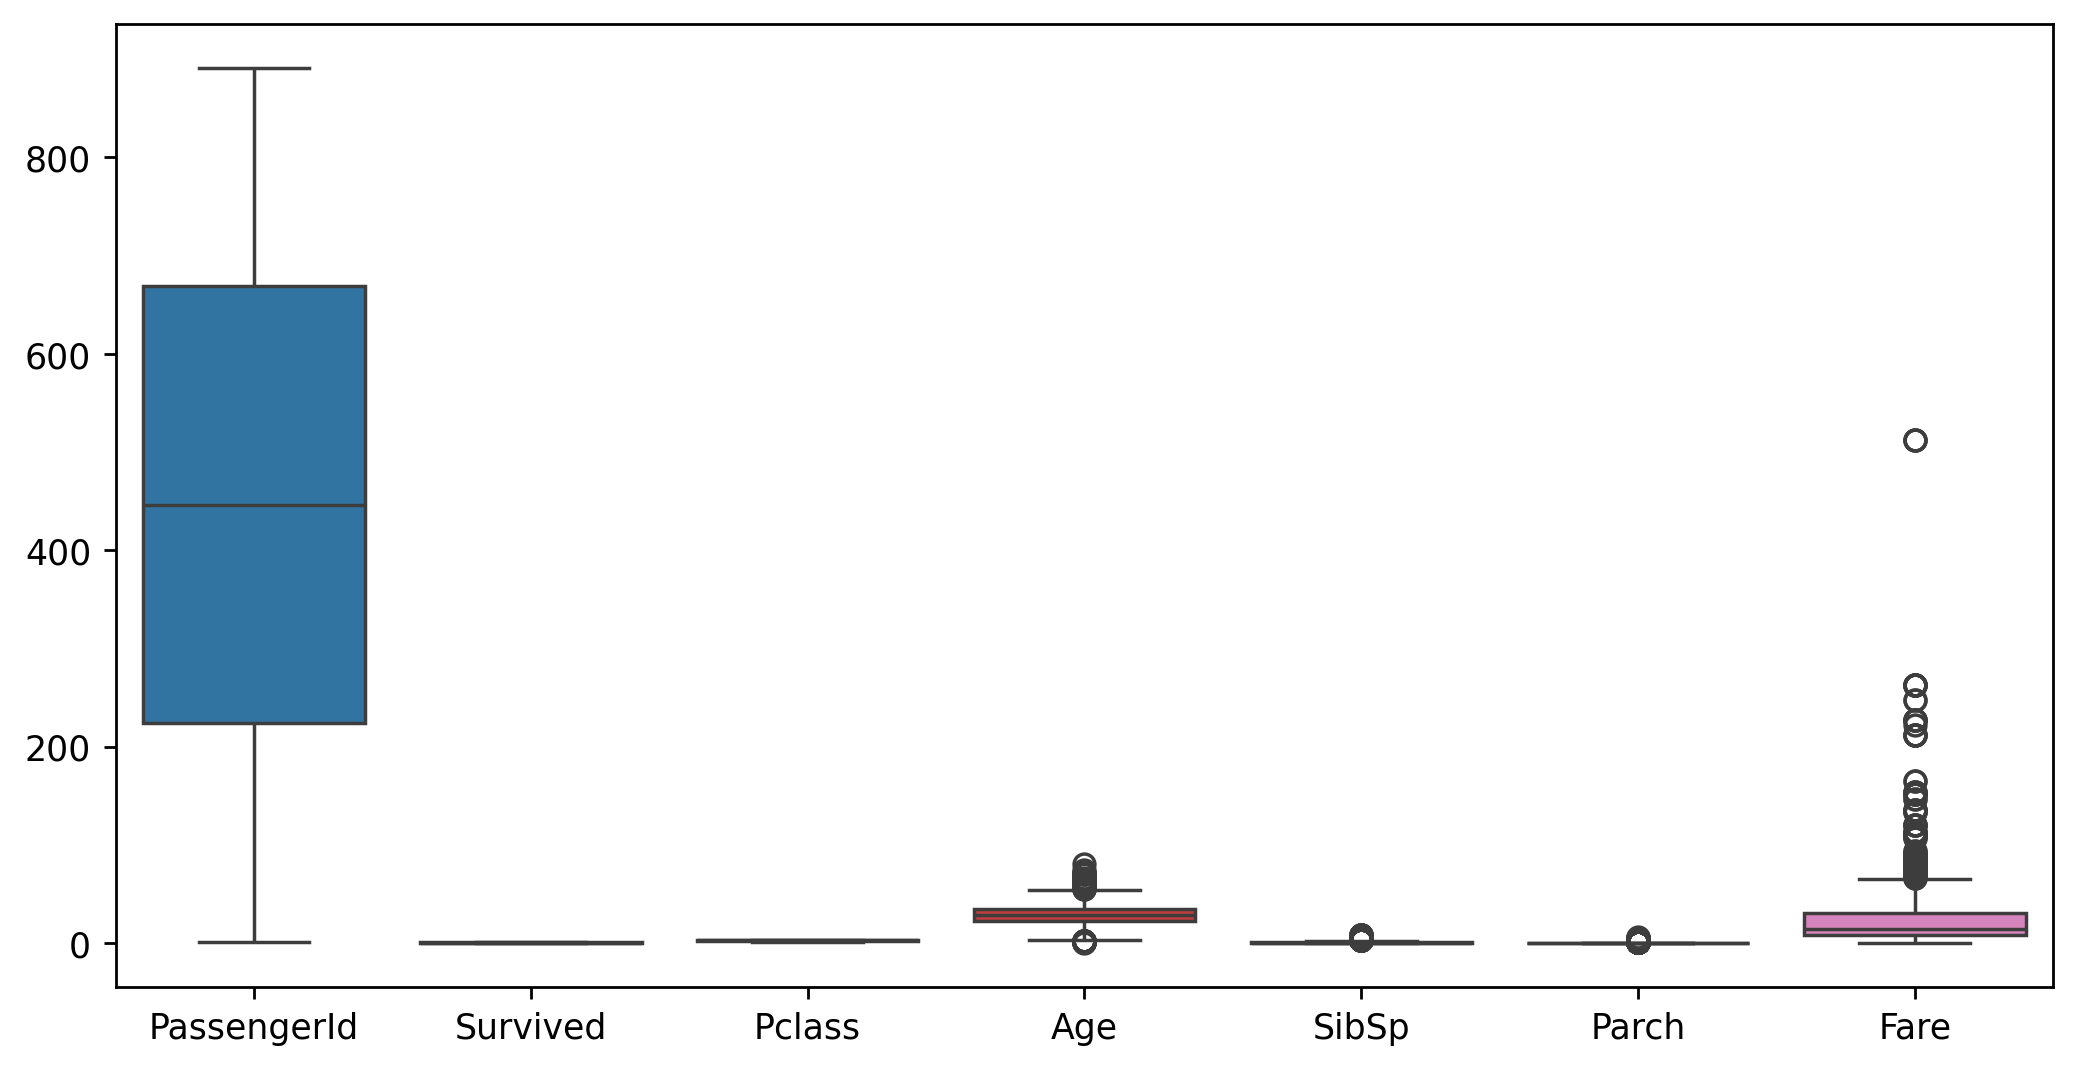

In [36]:
# plotting boxplot
sns.boxplot(train)

In [37]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
# Age, SibSp, Parch, Parch are having outliers

<Axes: xlabel='Sex', ylabel='count'>

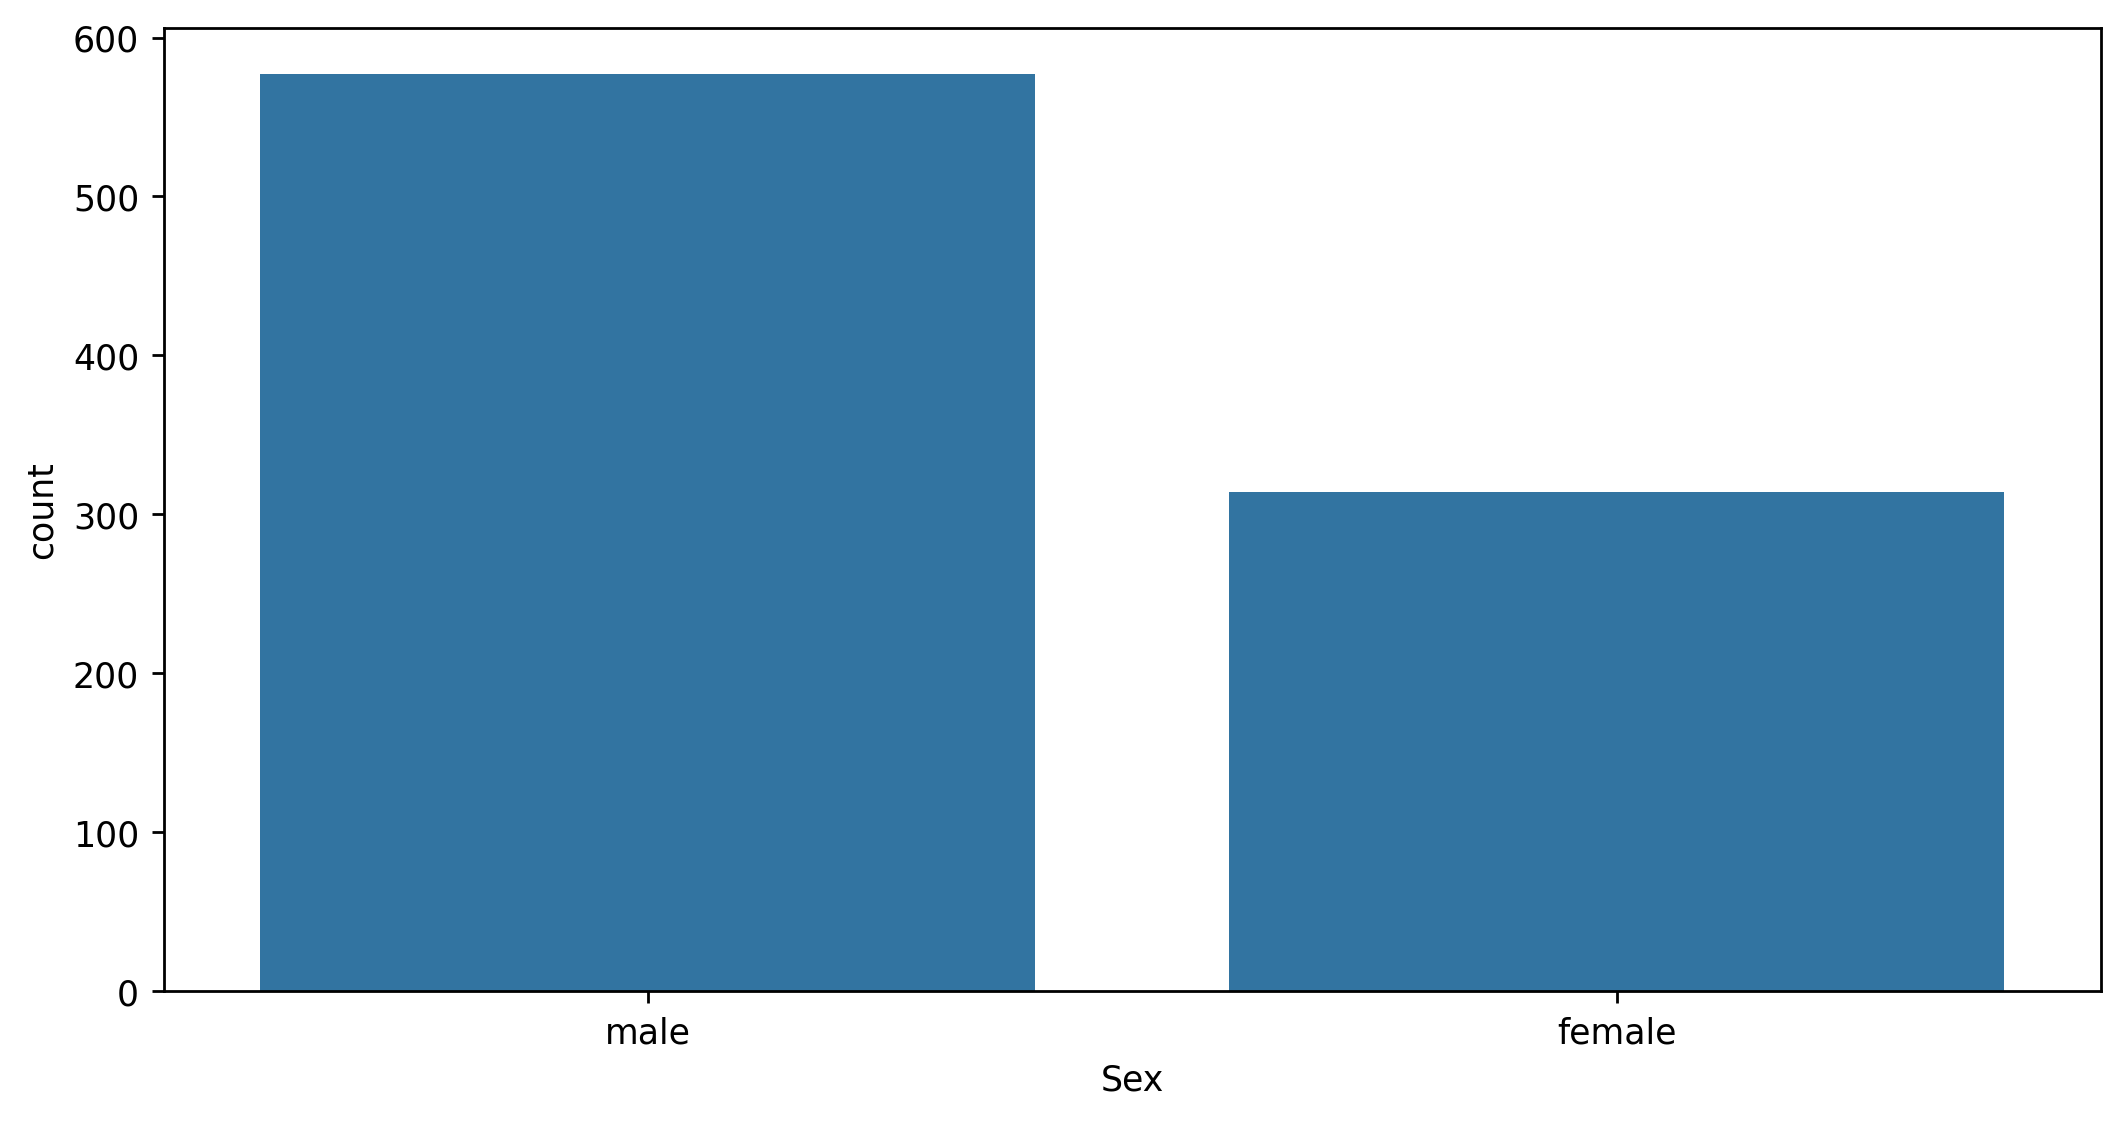

In [39]:
# distribution of sex column
sns.countplot(x=train['Sex'])

In [40]:
# males are more than the number of females

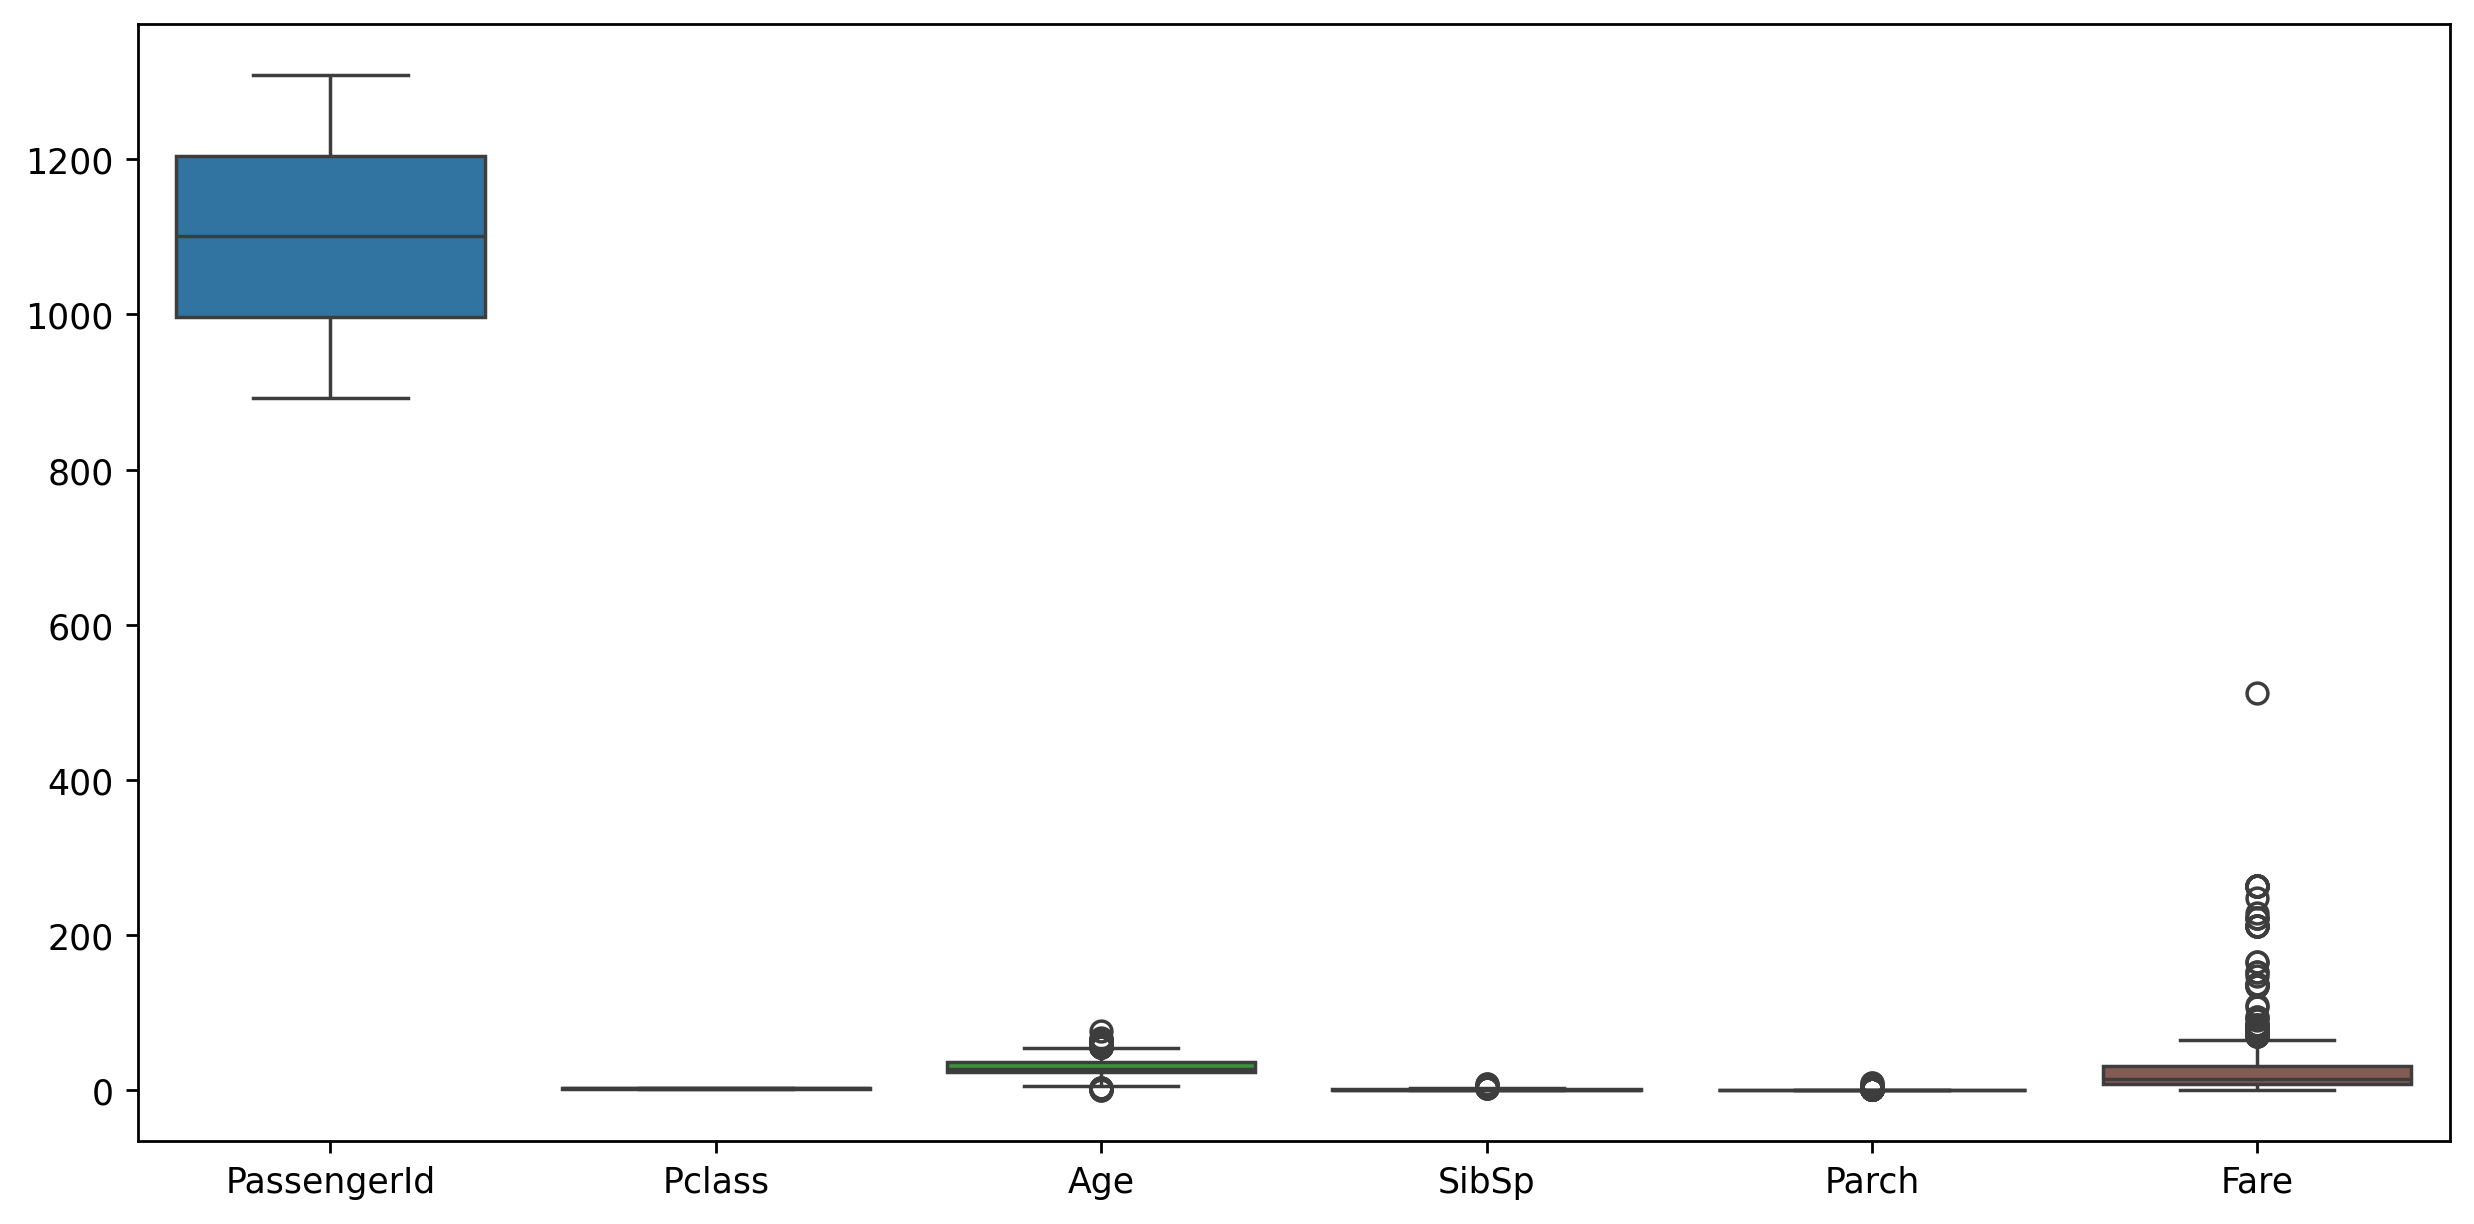

In [41]:
# box plot
sns.boxplot(test)
plt.tight_layout()


In [42]:
# Age, SibSp, Parch, Parch are having outliers

<Axes: xlabel='Sex', ylabel='count'>

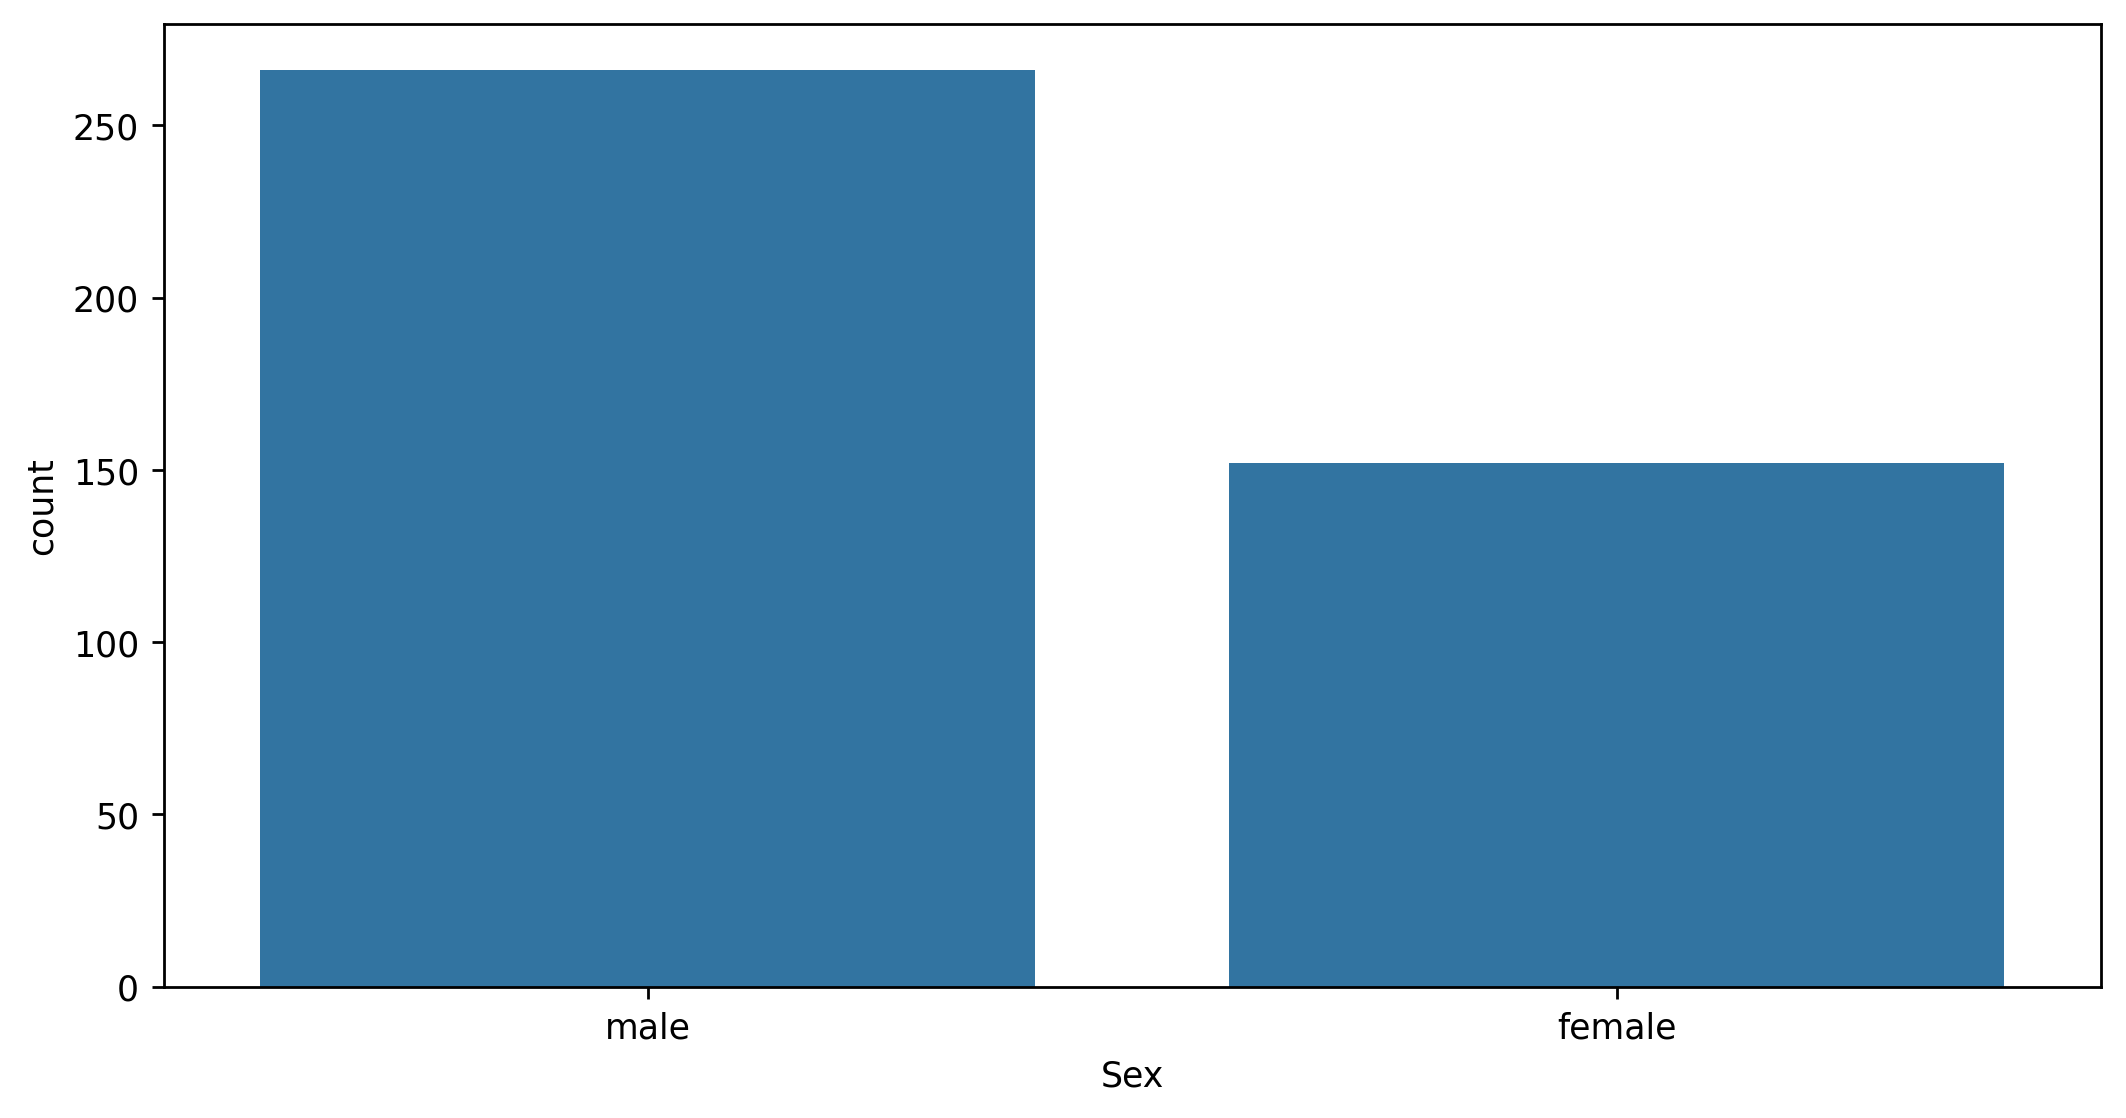

In [43]:
# distribution of sex column
sns.countplot(x=test['Sex'])

In [44]:
# number of male is more than the number of female

# dealing with the outliers

In [45]:
# age column is having the outliers but I should not cap them or remove because they can be very useful for the analysis of survival prediction

# correlation

In [46]:
# train data
train.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.034212,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500
Age,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688
SibSp,-0.057527,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000


<Axes: >

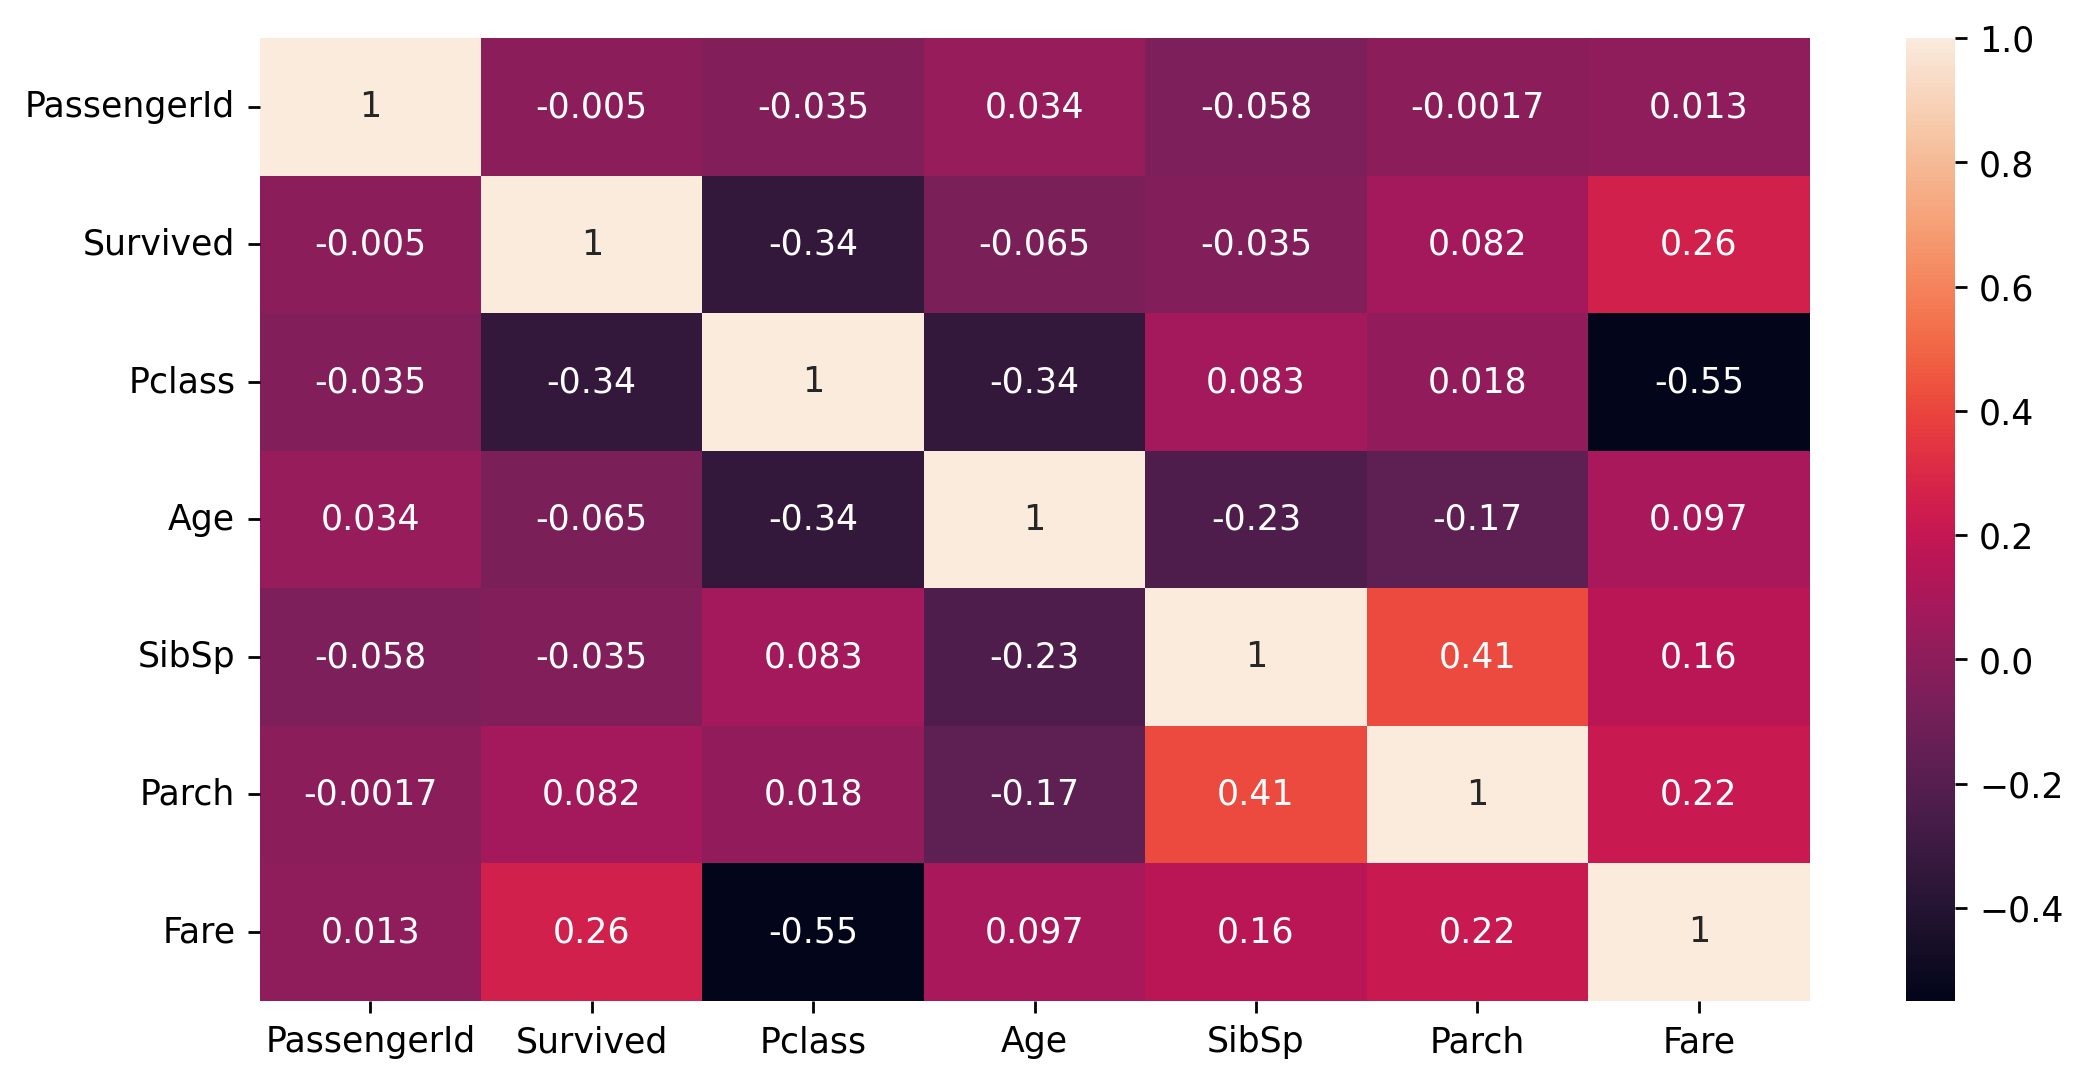

In [47]:
sns.heatmap(train.corr(numeric_only=True), annot=True)

In [48]:
# test data
test.corr(numeric_only=True)

,PassengerId,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.026751,-0.031447,0.003818,0.043080,0.008633
Pclass,-0.026751,1.000000,-0.467853,0.001087,0.018721,-0.577313
Age,-0.031447,-0.467853,1.000000,-0.071197,-0.043731,0.342357
SibSp,0.003818,0.001087,-0.071197,1.000000,0.306895,0.171912
Parch,0.043080,0.018721,-0.043731,0.306895,1.000000,0.230325
Fare,0.008633,-0.577313,0.342357,0.171912,0.230325,1.000000


<Axes: >

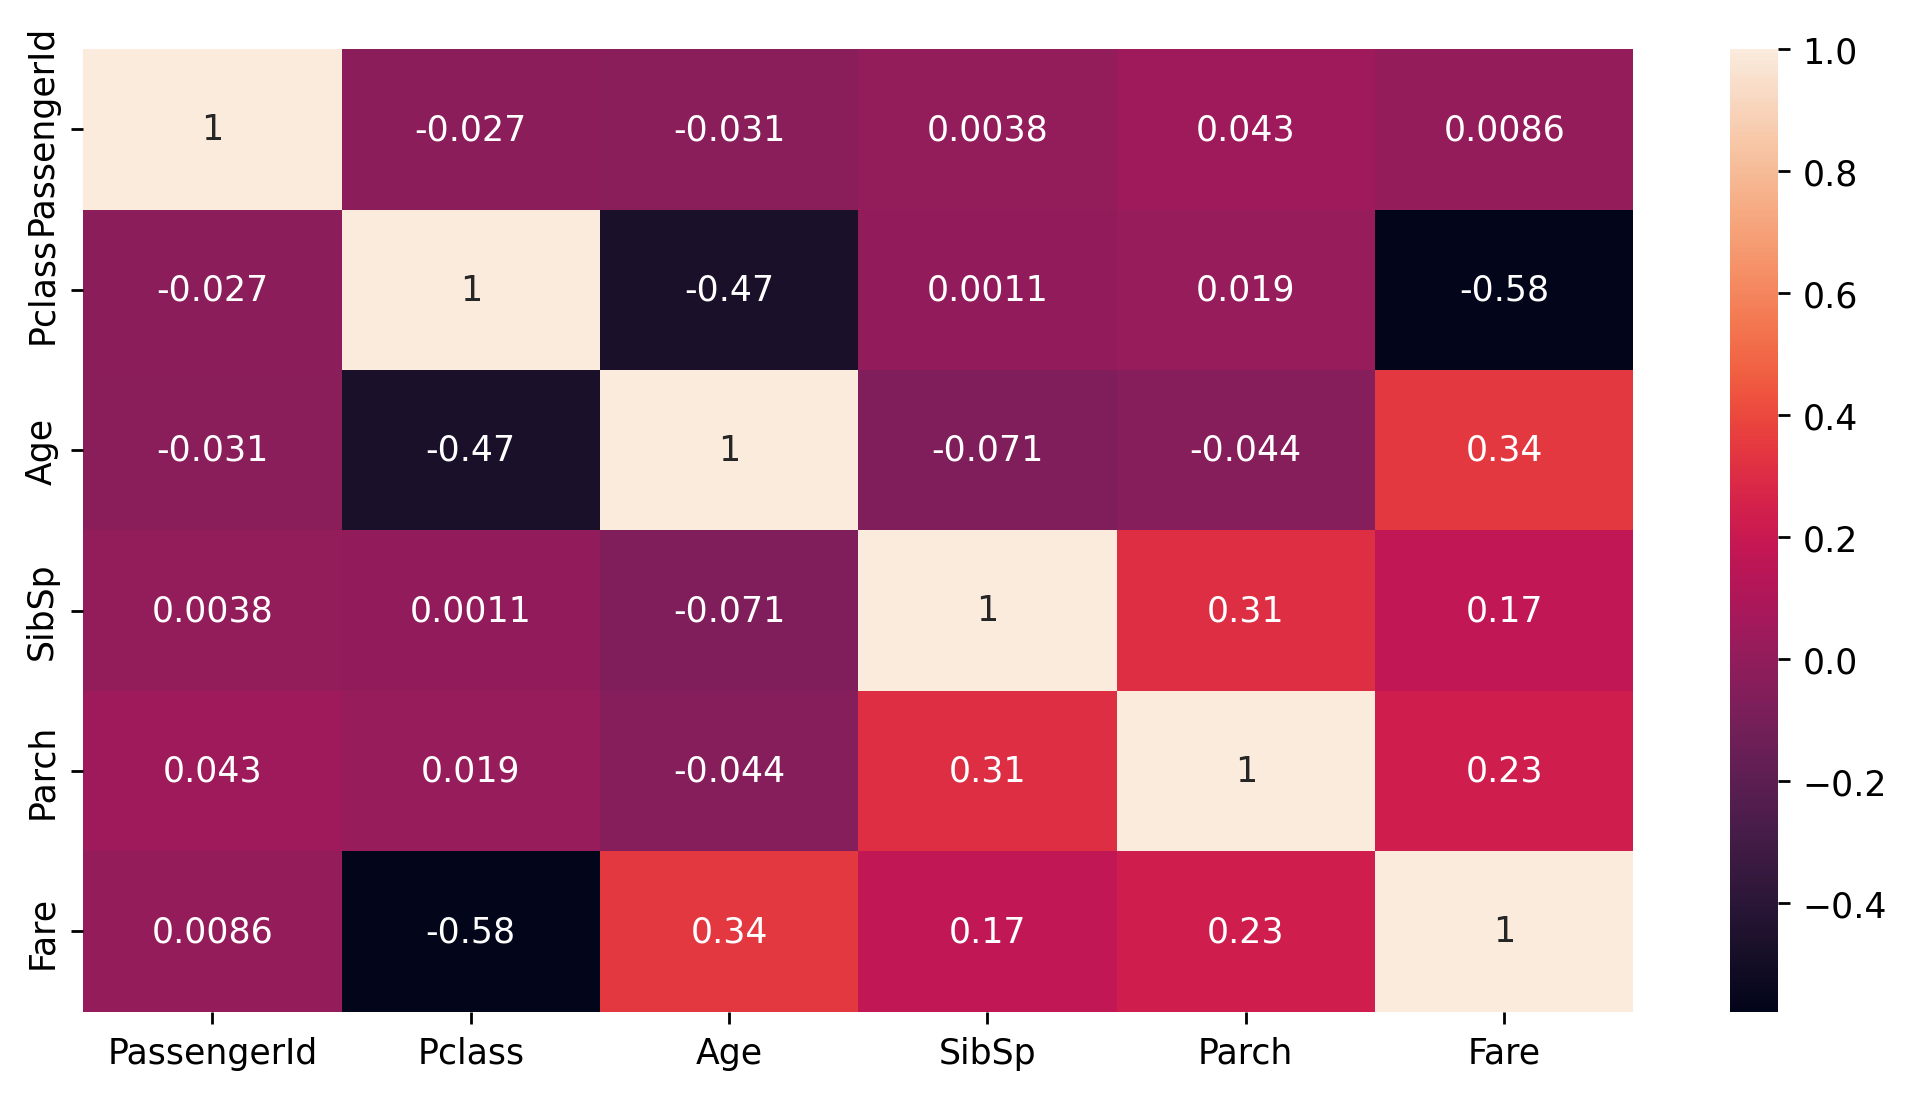

In [49]:
# heatmap
sns.heatmap(test.corr(numeric_only=True), annot=True)

# Feature Engineering

In [50]:
test.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


In [51]:
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [52]:
# droping columns cabin column from both train and test data
# dropping Name, PassengerId, Embarked, Ticket columns also because these are not useful for the prediciton

train.drop(columns=['PassengerId','Name', 'Cabin', 'Embarked', 'Ticket'],inplace=True)
test.drop(columns=['PassengerId','Name', 'Cabin', 'Embarked', 'Ticket'],inplace=True)

In [53]:
train.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833


In [54]:
test.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,34.5,0,0,7.8292
1,3,female,47.0,1,0,7.0000


In [55]:
# cabin column has been removed

# DATA TRANSFORMATION

In [56]:
# encoding Sex column by using pandas

train = pd.get_dummies(data=train, columns=['Sex'], dtype='int')
train

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,0,1
1,1,1,38.0,1,0,71.2833,1,0
2,1,3,26.0,0,0,7.9250,1,0
3,1,1,35.0,1,0,53.1000,1,0
4,0,3,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,1
887,1,1,19.0,0,0,30.0000,1,0
888,0,3,28.0,1,2,23.4500,1,0
889,1,1,26.0,0,0,30.0000,0,1


In [57]:
# encoding Sex column by using pandas

test = pd.get_dummies(data=test, columns=['Sex'], dtype='int')
test

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,3,34.5,0,0,7.8292,0,1
1,3,47.0,1,0,7.0000,1,0
2,2,62.0,0,0,9.6875,0,1
3,3,27.0,0,0,8.6625,0,1
4,3,22.0,1,1,12.2875,1,0
...,...,...,...,...,...,...,...
413,3,27.0,0,0,8.0500,0,1
414,1,39.0,0,0,108.9000,1,0
415,3,38.5,0,0,7.2500,0,1
416,3,27.0,0,0,8.0500,0,1


# MODEL BUILDING

In [58]:
# defining x and y variables for training data
x_train = train.iloc[:, 1:]
y_train = train['Survived']
# defining x variables for test data
x_test = test

In [59]:
# I don't have taget column for test data so I can't define x and y variable for test data

In [60]:
# first 3 records just to confirm
x_train.head(3)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,3,22.0,1,0,7.2500,0,1
1,1,38.0,1,0,71.2833,1,0
2,3,26.0,0,0,7.9250,1,0


In [61]:
# first 3 records just to confirm
y_train.head(3)

0    0
1    1
2    1
Name: Survived, dtype: int64

In [62]:
# first 3 records just to confirm
x_test.head(3)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,3,34.5,0,0,7.8292,0,1
1,3,47.0,1,0,7.0000,1,0
2,2,62.0,0,0,9.6875,0,1


### model building

# GRADIENT BOOSTING

In [63]:
# creating object for the GBclassifier class
gboost = GradientBoostingClassifier()

# model training
gboost.fit(x_train, y_train)

# getting prediction
gb_pred = gboost.predict(x_test)
gb_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

# I dont have actual labels in the test data so I can not evaluate the model's accuracy

# XGBOOST

In [64]:
# creating object for the XGBclassifier class
xgboost = xgb.XGBClassifier()

# model training
xgboost.fit(x_train, y_train)

# getting prediction
xgb_pred = xgboost.predict(x_test)
xgb_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
# Although I don't have the actual labels(target column values in the test data) in my test data so I cannot calculate the accuracy of the model

In [ ]:
# GradientBoosting and XGBoost both can be used for classification as well as regression problem statements
# these algorithms are one of the most powerful algorithms in machine learning
# XGBoost is a improved and powerful version of GradientBoosting.